In [1]:
# Import Matplot lib
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from config import username,password,host,port,database

In [2]:
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# Create the connection engine
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

In [4]:
# Use inspector to get table names
inspector = inspect(engine)
inspector.get_table_names()

['titles', 'employees', 'departments', 'dept_manager', 'salaries', 'dept_emp']

In [5]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('salaries')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
salary INTEGER


In [6]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('employees')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
emp_title VARCHAR(30)
birth_date VARCHAR(30)
first_name VARCHAR(255)
last_name VARCHAR(255)
sex VARCHAR(10)
hire_date VARCHAR(30)


In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('titles')
for c in columns:
    print(c['name'], c["type"])

title_id VARCHAR(30)
title VARCHAR(255)


In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Salaries = Base.classes.salaries
Employees = Base.classes.employees
Titles = Base.classes.titles

In [9]:
# Start a session to query the database
session = Session(engine)

In [10]:
# Query Salaries for `salary' and save the query into results
results = session.query(Salaries.salary).all()

In [11]:
# Unpack 'salary' into a list
salary = [result[0] for result in results]

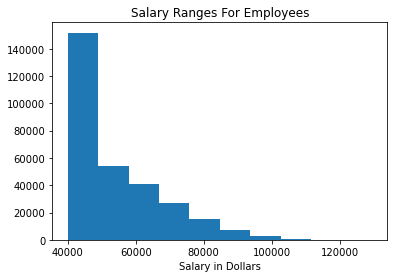

In [12]:
# Create histogram to visualize most common salary ranges
plt.hist(salary)
plt.title("Salary Ranges For Employees")
plt.xlabel("Salary in Dollars")
plt.show()

In [13]:
# Group by title, get average salary per title, save as results
results = session.query(Titles.title,func.avg(Salaries.salary)
                       ).filter(Employees.emp_no == Salaries.emp_no
                               ).filter(Titles.title_id == Employees.emp_title
                                       ).group_by(Titles.title
                                                 ).all()

In [14]:
# Unpack 'title' and 'salary' from results into separate lists
title = [result[0] for result in results]
salary = [int(result[1]) for result in results]

In [15]:
# Preview lists
print(title)
print(salary)

['Assistant Engineer', 'Engineer', 'Manager', 'Senior Engineer', 'Senior Staff', 'Staff', 'Technique Leader']
[48564, 48535, 51531, 48506, 58550, 58465, 48582]


<function matplotlib.pyplot.show(*args, **kw)>

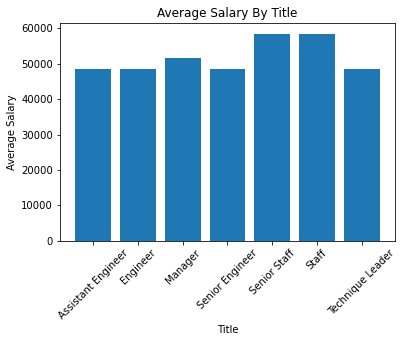

In [16]:
# Bar chart of average salary by title using matplotlib
plt.bar(title,salary)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.xticks(rotation='45')
plt.show

In [17]:
# Average salary by title in a pandas dataframe
df = pd.DataFrame(results, columns=['title', 'average_salary'])
df

,title,average_salary
0,Assistant Engineer,48564.434447300771
1,Engineer,48535.336511426337
2,Manager,51531.041666666667
3,Senior Engineer,48506.799871095788
4,Senior Staff,58550.172704359929
5,Staff,58465.382850331521
6,Technique Leader,48582.896091893319


In [18]:
# Searching ID no. 499942, April Foolsday, Ha, Ha!
session.query(Employees.emp_title,Employees.birth_date,Employees.first_name,Employees.last_name,Employees.sex,Employees.hire_date
             ).filter(Employees.emp_no == 499942
                     ).all()

[('e0004', '1/10/1963', 'April', 'Foolsday', 'F', '2/10/1997')]

In [19]:
# Close the session
session.close()